<a href="https://colab.research.google.com/github/jenylamar-cmyk/regresionlineal/blob/main/regresi%C3%B3n_lineal_taxi_parte1_Jenyffer_Lamar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Linear Regression
# Regresión Lineal
In this Colab you will use a real dataset to train a model to predict the fare of a taxi ride in Chicago, Illinois.
 Este proyecto utiliza datos reales para entrenar un modelo que prediga la tarifa de un viaje en taxi en Chicago, Illinois.

## Learning Objectives
Objetivos de aprendizaje

After completing this Colab, you'll be able to:
Tras completar este proyecto, podrás:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Explore a [dataset](https://developers.google.com/machine-learning/glossary/#data_set) with Python visualization libraries.
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) to build a linear regression model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).
  * Compare training runs using [root mean squared error](https://developers.google.com/machine-learning/glossary/#root-mean-squared-error-rmse) and [loss curves](https://developers.google.com/machine-learning/glossary/#loss-curve).

* Lee un archivo .csv y lo convierte en un DataFrame de pandas .
* Explora un conjunto de datos con las bibliotecas de visualización de Python.
* Experimenta con diferentes características para construir un modelo de regresión lineal.
* Ajusta los hiperparámetros del modelo .
* Compara las ejecuciones de entrenamiento utilizando el error cuadrático medio y las curvas de pérdida.

## Dataset Description
# Descripción del conjunto de datos

The [dataset for this exercise](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv) is derived from the [City of Chicago Taxi Trips dataset](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). The data for this exercise is a subset of the Taxi Trips data, and focuses on a two-day period in May of 2022.

El [conjunto de datos para este ejercicio](https://storage.mtls.cloud.google.com/mlcc-nextgen-internal/chicago_taxi_train.csv)  proviene de [conjunto de datos de viajes en taxi de la ciudad de Chicago](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew). Los datos de este ejercicio son un subconjunto de los datos de viajes en taxi y se centran en un período de dos días en mayo de 2022.

# Part 1 - Setup Exercise
# Parte 1 - Ejercicio de configuración


---

## Load required modules

This exercise depends on several Python libraries to help with data manipulation, machine learning tasks, and data visualization.

**Instructions**
1. Run the **Install required libraries** code cell (below).
1. Run the **Load dependencies** code cell (below).

## Cargar los módulos necesarios
Este ejercicio depende de varias bibliotecas de Python para ayudar con la manipulación de datos, las tareas de aprendizaje automático y la visualización de datos.

**Instrucciones**

Ejecute la celda de código **Instalar las bibliotecas necesarias** " (a continuación).
Ejecute la celda de código "**Cargar dependencias**" (a continuación).

In [2]:
#@title Install required libraries Instalamos las librerias

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.6/615.6 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.1 which

In [3]:
#@title Code - Load dependencies Cargamos las librerías instaladas

# data
import numpy as np # para trabajar con matrices
import pandas as pd # para trabajar con tablas de datos

# machine learning
import keras #construir modelos de ML
import ml_edu.experiment
import ml_edu.results

# data visualization
import plotly.express as px #Graficar

## Load the dataset
## Cargar el conjunto de datos


The following code cell loads the dataset and creates a pandas DataFrame.

You can think of a DataFrame like a spreadsheet with rows and columns. The rows represent individual data examples, and the columns represent the attributes associated with each example.

La siguiente celda de código carga el conjunto de datos y crea un DataFrame de pandas.

Un DataFrame se puede considerar como una hoja de cálculo con filas y columnas. Las filas representan ejemplos de datos individuales, y las columnas representan los atributos asociados a cada ejemplo.

In [4]:
# @title
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")
chicago_taxi_dataset.head()

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


In [5]:
chicago_taxi_dataset.size
list(chicago_taxi_dataset.columns)

['TRIP_START_TIMESTAMP',
 'TRIP_END_TIMESTAMP',
 'TRIP_START_HOUR',
 'TRIP_SECONDS',
 'TRIP_MILES',
 'TRIP_SPEED',
 'PICKUP_CENSUS_TRACT',
 'DROPOFF_CENSUS_TRACT',
 'PICKUP_COMMUNITY_AREA',
 'DROPOFF_COMMUNITY_AREA',
 'FARE',
 'TIPS',
 'TIP_RATE',
 'TOLLS',
 'EXTRAS',
 'TRIP_TOTAL',
 'PAYMENT_TYPE',
 'COMPANY']

Hora y fecha de inicio del viaje

Hora y fecha de fin del viaje

Hora de inicio

Segundos del viaje

Millas del viaje

Velocidad del viaje

Sector censal de recogida

Sector censal de destino

Área comunitaria de recogida

Área comunitaria de destino

Tarifa

Propinas

Tasa de propina

Peajes

Extras

Total del viaje

Tipo de pago

Compañía

## Update the dataframe
## Actualiza el conjunto de datos

The following code cell updates the DataFrame to use only specific columns from the dataset.

Notice that that output shows just a sample of the dataset, but there should be enough information for you to identify the features associated with the dataset, and have a look at the actual data for a few examples.

La siguiente celda de código actualiza el DataFrame para usar solo columnas específicas del conjunto de datos.

Tenga en cuenta que ese resultado proporciona solo una muestra del conjunto de datos, pero debería haber suficiente información para que pueda identificar las características asociadas con el conjunto de datos, y eche un vistazo a los datos reales para ver algunos ejemplos.

In [6]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
# Selecciona las columnas que contengan la información necesaria para ejecutar el modelo
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


# Part 2 - Dataset Exploration


---

## View dataset statistics
## Exploración del conjunto de datos

A large part of most machine learning projects is getting to know your data. In this step, you will use the ``DataFrame.describe`` method to view descriptive statistics about the dataset and answer some important questions about the data.

**Instructions**
1. Run the **View dataset statistics** code cell.
1. Inspect the output and answer these questions:
  * What is the maximum fare?
  * What is the mean distance across all trips?
  * How many cab companies are in the dataset?
  * What is the most frequent payment type?
  * Are any features missing data?
1. Run the code **View answers to dataset statistics** code cell to check your answers.


You might be wondering why there are groups of `NaN` (not a number) values listed in the output. When working with data in Python, you may see this value if the result of a calculation can not be computed or if there is missing information. For example, in the taxi dataset `PAYMENT_TYPE` and `COMPANY` are non-numeric, categorical features; numeric information such as mean and max do not make sense for categorical features so the output displays `NaN`.

Una parte importante de la mayoría de los proyectos de aprendizaje automático consiste en familiarizarse con los datos. En este paso, utilizará el DataFrame.describemétodo para visualizar estadísticas descriptivas sobre el conjunto de datos y responder algunas preguntas importantes sobre los mismos.

Instrucciones

Ejecute la celda de código de estadísticas del conjunto de datos de visualización .
Examine el resultado y responda a estas preguntas:
¿Cuál es la tarifa máxima?
¿Cuál es la distancia media recorrida en todos los viajes?
¿Cuántas compañías de taxis hay en el conjunto de datos?
¿Cuál es el tipo de pago más frecuente?
¿Faltan datos para alguna función?
Ejecuta el código y consulta la celda de código de estadísticas del conjunto de datos para comprobar tus respuestas.
Quizás te preguntes por qué aparecen grupos de NaNvalores (no numéricos) en la salida. Al trabajar con datos en Python, este valor puede aparecer si no se puede calcular el resultado de una operación o si falta información. Por ejemplo, en el conjunto de datos de taxis, PAYMENT_TYPElas COMPANYvariables categóricas no numéricas (como `taxi` y `max`) no tienen sentido para este tipo de variables, por lo que la salida muestra `<valor>` NaN.

In [7]:
#@title Code - View dataset statistics
# Ver estadísticas del conjunto de datos

print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
#Cuantas filas hay
training_df.describe(include='all')
#Análisis estadístico de todas las columnas

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [8]:
#@title Double-click or run to view answers about dataset statistics
# Haga doble clic o ejecute el comando para ver las respuestas sobre las estadísticas del conjunto de datos.

answer = '''
What is the maximum fare? 				              Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		  Answer: 31
What is the most frequent payment type? 		    Answer: Credit Card
Are any features missing data? 				          Answer: No
'''

# You should be able to find the answers to the questions about the dataset
# by inspecting the table output after running the DataFrame describe method.
#
# Run this code cell to verify your answers.

# What is the maximum fare?
max_fare = training_df['FARE'].max()
print("What is the maximum fare? 				Answer: ${fare:.2f}".format(fare = max_fare))

# What is the mean distance across all trips?
mean_distance = training_df['TRIP_MILES'].mean()
print("What is the mean distance across all trips? 		Answer: {mean:.4f} miles".format(mean = mean_distance))

# How many cab companies are in the dataset?
num_unique_companies =  training_df['COMPANY'].nunique()
print("How many cab companies are in the dataset? 		Answer: {number}".format(number = num_unique_companies))

# What is the most frequent payment type?
most_freq_payment_type = training_df['PAYMENT_TYPE'].value_counts().idxmax()
print("What is the most frequent payment type? 		Answer: {type}".format(type = most_freq_payment_type))

# Are any features missing data?
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? 				Answer:", "No" if missing_values == 0 else "Yes")

What is the maximum fare? 				Answer: $159.25
What is the mean distance across all trips? 		Answer: 8.2895 miles
How many cab companies are in the dataset? 		Answer: 31
What is the most frequent payment type? 		Answer: Credit Card
Are any features missing data? 				Answer: No


## Generate a correlation matrix

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). If you have ever taken a taxi ride before, your experience is probably telling you that the fare is typically associated with the distance traveled and the duration of the trip. But, is there a way for you to learn more about how well these features correlate to the fare (label)?

In this step, you will use a **correlation matrix** to identify features whose values correlate well with the label. Correlation values have the following meanings:

  * **`1.0`**: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * **`-1.0`**: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * **`0.0`**: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power.

**Instructions**

1. Inspect the code in the **View correlation matrix** code cell.
1. Run the **View correlation matrix** code cell and inspect the output.
1. **Check your understanding** by answering these questions:
  * Which feature correlates most strongly to the label FARE?
  * Which feature correlates least strongly to the label FARE?

Una parte importante del aprendizaje automático consiste en determinar qué características se correlacionan con la etiqueta . Si alguna vez has tomado un taxi, probablemente sepas que la tarifa suele estar relacionada con la distancia recorrida y la duración del viaje. Pero, ¿existe alguna manera de saber con más detalle qué tan bien se correlacionan estas características con la tarifa (etiqueta)?

En este paso, utilizará una matriz de correlación para identificar las características cuyos valores se correlacionan bien con la etiqueta. Los valores de correlación tienen los siguientes significados:

1.0Correlación positiva perfecta; es decir, cuando un atributo aumenta, el otro atributo también aumenta.
-1.0: correlación negativa perfecta; es decir, cuando un atributo aumenta, el otro disminuye.
0.0: no existe correlación; las dos columnas no están relacionadas linealmente .
En general, cuanto mayor sea el valor absoluto de una correlación, mayor será su poder predictivo.

Instrucciones

Examine el código en la celda de código de la matriz de correlación de vistas .
Ejecute la celda de código de la matriz de correlación de visualización e inspeccione el resultado.
Comprueba tu comprensión respondiendo a estas preguntas:
¿Qué característica se correlaciona más fuertemente con la etiqueta FARE?
¿Qué característica se correlaciona menos fuertemente con la etiqueta FARE?

In [9]:
#@title Code - View correlation matrix
# Ver matriz de correlación
training_df.corr(numeric_only = True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


In [10]:
#@title Double-click to view answers about the correlation matrix

# Which feature correlates most strongly to the label FARE?
# ---------------------------------------------------------
answer = '''
The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.
'''
print(answer)


# Which feature correlates least strongly to the label FARE?
# -----------------------------------------------------------
answer = '''The feature with the weakest correlation to the FARE is TIP_RATE.'''
print(answer)


The feature with the strongest correlation to the FARE is TRIP_MILES.
As you might expect, TRIP_MILES looks like a good feature to start with to train
the model. Also, notice that the feature TRIP_SECONDS has a strong correlation
with fare too.

The feature with the weakest correlation to the FARE is TIP_RATE.


La característica con la correlación más fuerte con la TARIFA es TRIP_MILES.
Como era de esperar, TRIP_MILES parece una buena función para comenzar a entrenar.
el modelo. Observe también que la función TRIP_SECONDS tiene una fuerte correlación
con tarifa también.

La característica con la correlación más débil con la TARIFA es TIP_RATE.

## Visualize relationships in dataset
## Visualizar relaciones en el conjunto de datos

Sometimes it is helpful to visualize relationships between features in a dataset; one way to do this is with a pair plot. A **pair plot** generates a grid of pairwise plots to visualize the relationship of each feature with all other features all in one place.

**Instructions**
1. Run the **View pair plot** code cell.

A veces resulta útil visualizar las relaciones entre las características de un conjunto de datos; una forma de hacerlo es mediante un gráfico de pares. Un gráfico de pares genera una cuadrícula de pares de gráficos para visualizar la relación de cada característica con todas las demás en un mismo lugar.

**Instrucciones**

Ejecutar la celda de código del gráfico de pares de vistas

In [11]:
#@title Code - View pairplot
# Graficar los datos

px.scatter_matrix(training_df, dimensions=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

# Part 3 - Train Model
# Entrenar el modelo

---

## Define functions to build and train a model

The code you need to build and train your model is in the **Define ML functions** code cell. If you would like to explore this code, expand the code cell and take a look.

**Instructions**
1. Run the **Define ML functions** code cell.

Definir funciones para construir y entrenar un modelo

El código necesario para crear y entrenar el modelo se encuentra en la celda de código "Definir funciones de ML" . Si desea explorar este código, expanda la celda y revísela.

Instrucciones

Ejecute la celda de código Definir funciones ML .
Entrena un modelo con una característica
En este paso, entrenarás un modelo para predecir el costo del pasaje usando una sola característica . Anteriormente, viste que TRIP_MILES la distancia tiene la correlación más fuerte con la longitud FARE, así que comencemos con la TRIP_MILES longitud como la característica para tu primer entrenamiento.

Instrucciones

Ejecute la celda de código del Experimento 1 para construir su modelo con una característica.
Revisa los resultados de la ejecución del entrenamiento.
Comprueba tu comprensión respondiendo a estas preguntas:
¿Cuántas épocas fueron necesarias para converger en el modelo final?
¿Qué tan bien se ajusta el modelo a los datos de muestra?
Durante el entrenamiento, verá el error cuadrático medio (RMSE) en la salida. Las unidades del RMSE son las mismas que las de la etiqueta (dólares). En otras palabras, puede usar el RMSE para determinar la diferencia promedio, en dólares, entre las tarifas predichas y los valores observados.

In [12]:
#@title Code - Define ML functions
# Definir funciones de ML
# Crea el modelo y define las características que queremos dentro de el.
def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  #Define la forma del modelo
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.

  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  # Crea le modelo Keras
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  #Elejimos MSE
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model
#Devuelve le modelo listo para entrenar

#Identificativo del entrenamiento
def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""
# Entrena el modelo proporcinando datos

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  # Lista de columnas que se van a usar en el modelo
  # Guarda en un diccionario llamado Features
  features = {name: dataset[name].values for name in settings.input_features}
  # Nombre de la columna que se va a predecir
  label = dataset[label_name].values
  # Guarda la lista de épocas y como cambiaron el Loss y las métricas en cada época
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  # Devuelve Experiment con la configuración, el modelo entreado, los epochs y el historial de métricas del Dataframe
  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Train a model with one feature
## Entrena un modelo con una característica

In this step you will train a model to predict the cost of the fare using a **single feature**. Earlier, you saw that `TRIP_MILES` (distance) correlates most strongly with the ``FARE``, so let's start with `TRIP_MILES` as the feature for your first training run.

**Instructions**

1. Run the **Experiment 1** code cell to build your model with one feature.
1. Review the output from the training run
1. **Check your understanding** by answering these questions:
  * How many epochs did it take to converge on the final model?
  * How well does the model fit the sample data?

During training, you should see the root mean square error (RMSE) in the output. The units for RMSE are the same as the units for the label (dollars). In other words, you can use the RMSE to determine how far off, on average, the predicted fares are in dollars from the observed values.


En este paso, entrenarás un modelo para predecir el costo del pasaje usando una sola característica . Anteriormente, viste que TRIP_MILESla distancia tiene la correlación más fuerte con la longitud FARE, así que comencemos con la TRIP_MILESlongitud como la característica para tu primer entrenamiento.

Instrucciones

Ejecute la celda de código del Experimento 1 para construir su modelo con una característica.
Revisa los resultados de la ejecución del entrenamiento.
Comprueba tu comprensión respondiendo a estas preguntas:
¿Cuántas épocas fueron necesarias para converger en el modelo final?
¿Qué tan bien se ajusta el modelo a los datos de muestra?
Durante el entrenamiento, verá el error cuadrático medio (RMSE) en la salida. Las unidades del RMSE son las mismas que las de la etiqueta (dólares). En otras palabras, puede usar el RMSE para determinar la diferencia promedio, en dólares, entre las tarifas predichas y los valores observados.

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 990.3653 - rmse: 31.4559
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 592.1765 - rmse: 24.3148
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 300.2614 - rmse: 17.3015
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 107.7290 - rmse: 10.3434
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 23.1154 - rmse: 4.7962
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.3085 - rmse: 4.0132
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.9853 - rmse: 3.8628
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8826 - rmse: 3.7194
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.3723 - rmse: 3.5062
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.4181 - rmse: 3.7945
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3885 - rmse: 3.6538
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.0092 - rmse: 

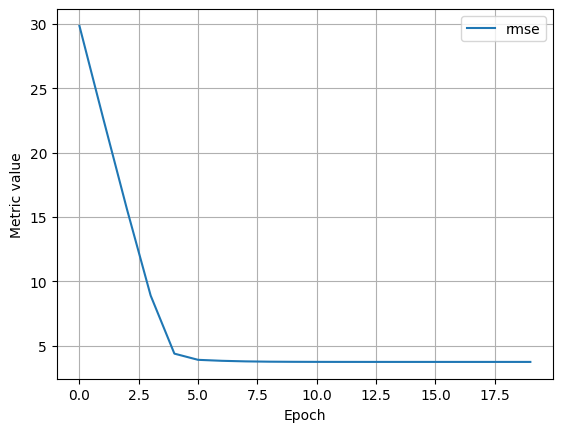

In [13]:
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [14]:
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4134.3105 - rmse: 62.7169
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3341.7214 - rmse: 57.7707
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3341.4683 - rmse: 57.6415
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3412.2466 - rmse: 58.3072
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3216.1680 - rmse: 56.6443
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3311.8762 - rmse: 57.5310
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3206.2598 - rmse: 56.4826
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3228.6785 - rmse: 56.6621
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3122.1985 - rmse: 55.4084
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3198.4556 - rmse: 56.2409
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3291.5164 - rmse: 57.1652
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

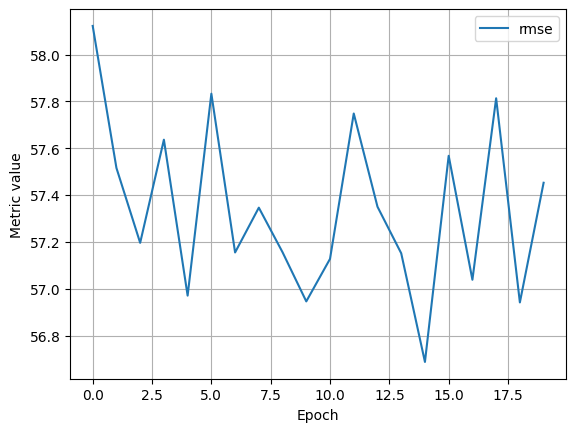

In [23]:
#@title Code - Experiment 2
# Experimento 2
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 10.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

# TAZA DE APRENDIZAJE


Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2244.8989 - rmse: 47.3796
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2173.4321 - rmse: 46.6185
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2069.5547 - rmse: 45.4859
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1951.8081 - rmse: 44.1779
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1882.2815 - rmse: 43.3813
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1771.1113 - rmse: 42.0817
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1673.3740 - rmse: 40.9061
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1583.1193 - rmse: 39.7882
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1512.2478 - rmse: 38.8860
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1410.6473 - rmse: 37.5564
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1342.2610 - rmse: 36.6351
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


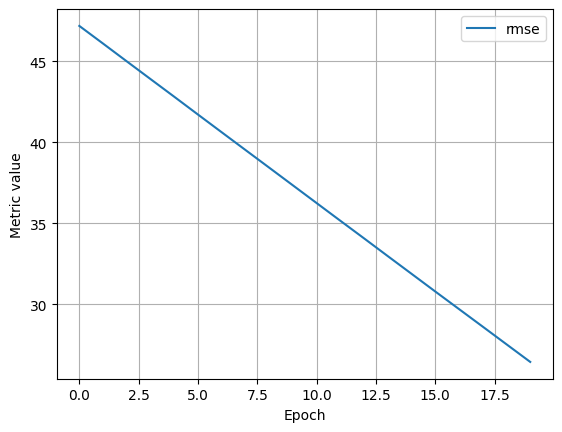

In [18]:
# MINIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.00015,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1503.5573 - rmse: 37.8607
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1234.6830 - rmse: 35.0726
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1209.6758 - rmse: 34.6335
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1250.4114 - rmse: 35.2899
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1127.6219 - rmse: 33.3977
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1172.8309 - rmse: 34.0879
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1148.9587 - rmse: 33.8207
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1275.6871 - rmse: 35.6188
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1226.4993 - rmse: 35.0120
Epoch 10/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1202.3879 - rmse: 34.5742
Epoch 11/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1251.0939 - rmse: 35.2757
Epoch 12/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


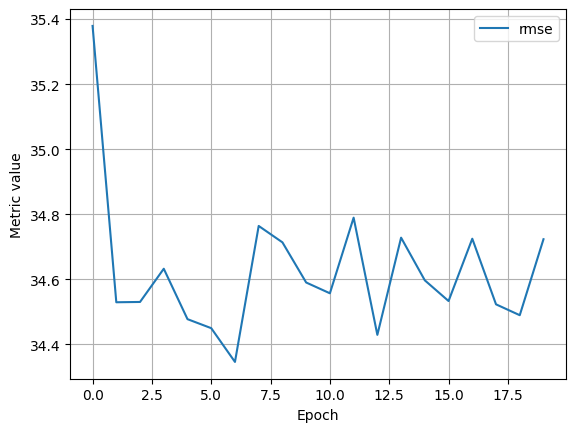

In [19]:
# MAXIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 6.0,
    number_epochs = 20,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

# ÉPOCAS

Epoch 1/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 962.9519 - rmse: 31.0125
Epoch 2/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 566.3539 - rmse: 23.7756
Epoch 3/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 280.2759 - rmse: 16.7070
Epoch 4/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 95.6042 - rmse: 9.7401
Epoch 5/5
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.6393 - rmse: 4.6331
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


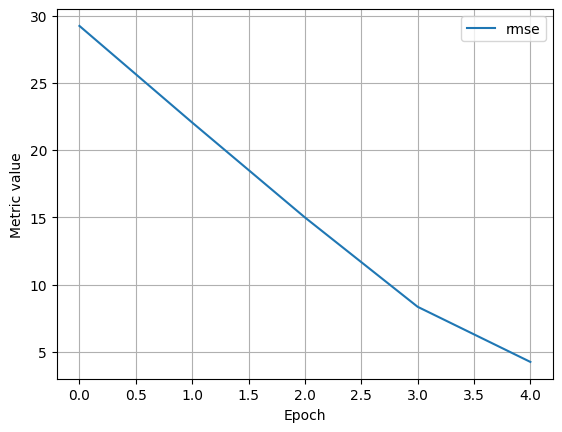

In [20]:
# MINIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 5,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 140.5941 - rmse: 11.8265
Epoch 2/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 35.9715 - rmse: 5.9735
Epoch 3/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.4610 - rmse: 4.4096
Epoch 4/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18.6501 - rmse: 4.3147
Epoch 5/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.8500 - rmse: 4.1008
Epoch 6/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.6645 - rmse: 3.8246
Epoch 7/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.9458 - rmse: 4.1088
Epoch 8/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.7562 - rmse: 3.8385
Epoch 9/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.0805 - rmse: 3.7496
Epoch 10/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.7575 - rmse: 3.7042
Epoch 11/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.3284 - rmse: 3.6454
Epoch 12/22
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.9622 - rmse: 3.8587

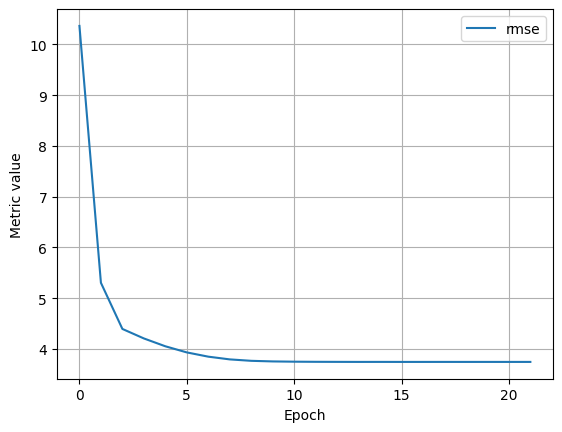

In [21]:
#MAXIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 22,
    batch_size = 50,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

# BATCH

Epoch 1/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 497.8744 - rmse: 21.9682
Epoch 2/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 14.5521 - rmse: 3.8057
Epoch 3/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.9259 - rmse: 3.7279
Epoch 4/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.8550 - rmse: 3.7179
Epoch 5/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.2935 - rmse: 3.6362
Epoch 6/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 14.9787 - rmse: 3.8643
Epoch 7/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.5759 - rmse: 3.6755
Epoch 8/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 12.6260 - rmse: 3.5349
Epoch 9/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 13.0446 - rmse: 3.5992
Epoch 10/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13.0605 - rmse: 3.6061
Epoch 11/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 15.6531 - rmse: 3.9363
Epoch 12/20
3170/3170 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss

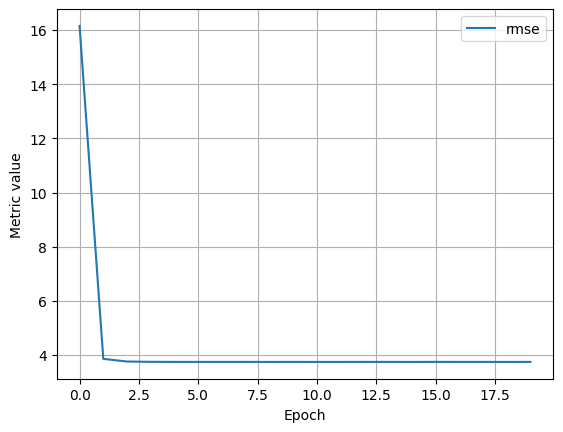

In [22]:
# MINIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 10,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

Epoch 1/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2081.1550 - rmse: 45.6143
Epoch 2/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1623.6586 - rmse: 40.2900
Epoch 3/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1228.2113 - rmse: 35.0401
Epoch 4/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 908.7402 - rmse: 30.1309
Epoch 5/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 616.9200 - rmse: 24.8227
Epoch 6/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 382.6292 - rmse: 19.5473
Epoch 7/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 211.0506 - rmse: 14.5114
Epoch 8/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 91.9758 - rmse: 9.5677
Epoch 9/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.6088 - rmse: 5.2429
Epoch 10/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.2618 - rmse: 3.8996
Epoch 11/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.7160 - rmse: 3.6961
Epoch 12/20
453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.2155

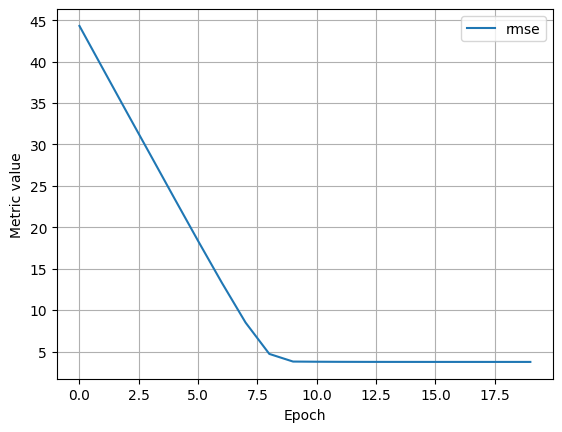

In [24]:
#MÁXIMO
#@title Code - Experiment 1
# Experimento 1
# Crea la configuración del experimento
# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 20,
    batch_size = 70,
    input_features = ['TRIP_MILES']
)
# Define la métrica que usa RMSE
metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]
# Creas un modelo de regresión lineal donde solo usas TRIP MILES
model_1 = create_model(settings_1, metrics)
# Entrenas el modelo para predecir la tarifa
experiment_1 = train_model('one_feature', model_1, training_df, 'FARE', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'FARE')

In [15]:
#@title Double-click to view answers for training model with one feature

# How many epochs did it take to converge on the final model?
# -----------------------------------------------------------------------------
answer = """
Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.
"""
print(answer)

# How well does the model fit the sample data?
# -----------------------------------------------------------------------------
answer = '''
It appears from the model plot that the model fits the sample data fairly well.
'''
print(answer)


Use the loss curve to see where the loss begins to level off during training.

With this set of hyperparameters:

  learning_rate = 0.001
  epochs = 20
  batch_size = 50

it takes about 5 epochs for the training run to converge to the final model.


It appears from the model plot that the model fits the sample data fairly well.



Utilice la curva de pérdida para ver dónde la pérdida comienza a estabilizarse durante el entrenamiento.

Con este conjunto de hiperparámetros:

  tasa de aprendizaje = 0,001
  épocas = 20
  tamaño_del_lote = 50

Se necesitan aproximadamente 5 épocas para que la ejecución de entrenamiento converja al modelo final.


Del gráfico del modelo se desprende que éste se ajusta bastante bien a los datos de muestra.
